## Projeto 2- Paralelização do traveling salesman - Paulo Tozzo

## O Problema

O problema do caixeiro-viajante é um problema comum na área de logísticas, ele é basicamente: dado n pontos qual é o menor caminho que percorra todos esses pontos?. Esse problema é classificado como NP-completo, sua solução ótima é custosa em relação ao tempo,ja que ela é exponencial, assim a paralelização do código fornece respostas mais rápidas se comparadas com uma solução sequencial. Existem outras soluções que não retornam caminhos ótimos, e sim bons, porém são mais rápidas, duas dessas estão foram paralelizadas e também estão apresentadas.

In [1]:
import subprocess
from subprocess import PIPE
import numpy as np
import matplotlib.pyplot as plt

## Organização do codigo
A solução ótima do traveling salmen é simples, ela simplesmente testar todas as possibilidades de caminho e acha a melhor delas, o codifo “tsp.cc” faz axatamente isso, usando recursão para seguir todos os pontos até não existirem mais nenhum, o código em paralelo cria uma task nova para cada possibilidade de caminho a partir do primeiro, então cada task resolve o resto do caminho de maneira sequencial, por exemplo para uma entrada de n=100 será criada 99 tasks. Ja o 2-opt criam caminhos randomicamente em paralelo, e depois mudam a sequência dos pontos até não ter melhora no custo total, e o último algoritmo, vizinhos mais próximos, simplesmente pegam o ponto mais próximo do atual, começando do zero, até todos os pontos acabarem.

## Descrição dos testes
Foi realizado  testes 7 de desempenho, comparado a solução euxastiva paralela com a sequencial, também foi comparado o algoritmo 2-opt  com o algoritmo do vizinho mais próximo, esse são muito mais rapidos mas geram soluções sub-ótimas. Para medir o tempo foi usado `std::chrono::high_resolution_clock`, e para diminuir a variação de tempo os testes os testes foram executados múltiplas vezes e foi feita a média. O computador que executou os testes têm como hardware relevente um processador i7-8550U CPU @ 1.80GHz.
É esperado que os arquivos compilados estajam em uma pasta chamada build.


## teste 1
teste simples que em que os três pontos formam um triângulo retângulo.


In [2]:
with open('teste1.txt', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_para = [];

for i in range(100):
    main = subprocess.run(["build/seq"],input = data,stderr=PIPE)
    main_para = subprocess.run(["build/para"],input = data,stderr=PIPE)

    time_main.append(float((main.stderr).decode("utf-8")))
    time_para.append(float((main_para.stderr).decode("utf-8")))

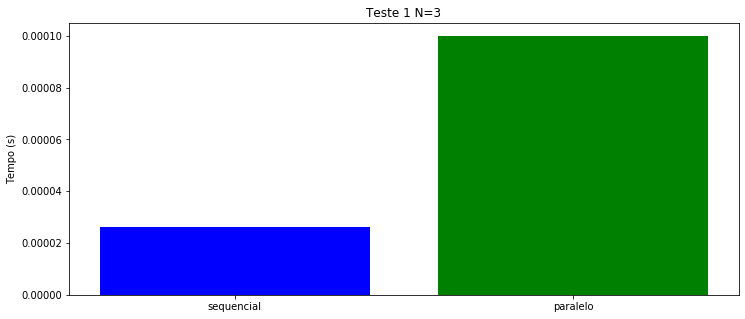

In [3]:
x = np.arange(2)
mean_list = [np.mean(time_main),np.mean(time_para)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green"])
plt.xticks(x, ["sequencial","paralelo"])
plt.ylabel("Tempo (s)")
plt.title("Teste 1 N=3")
plt.show()

## teste 2
teste mais complexo que contem 10 pontos aleatoriamente gerados usando o programa "gerador.py". 

In [4]:
with open('teste3.txt', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_para = [];

for i in range(10):
    main = subprocess.run(["build/seq"],input = data,stderr=PIPE)
    main_para = subprocess.run(["build/para"],input = data,stderr=PIPE)

    time_main.append(float((main.stderr).decode("utf-8")))
    time_para.append(float((main_para.stderr).decode("utf-8")))

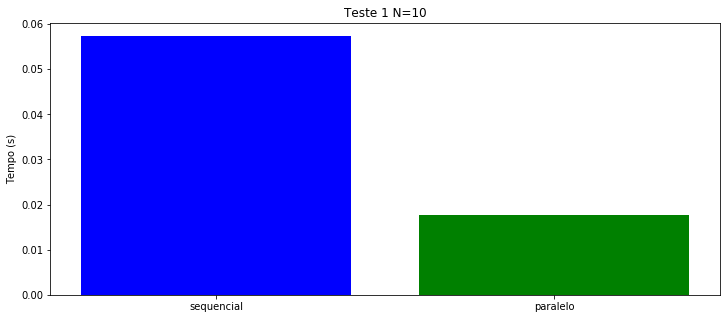

In [5]:
x = np.arange(2)
mean_list = [np.mean(time_main),np.mean(time_para)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green"])
plt.xticks(x, ["sequencial","paralelo"])
plt.ylabel("Tempo (s)")
plt.title("Teste 1 N=10")
plt.show()

## teste 3
teste que contem 13 pontos aleatoriamente gerados usando o programa "gerador.py". 

In [6]:
with open('teste4.txt', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_para = [];

for i in range(2):
    main = subprocess.run(["build/seq"],input = data,stderr=PIPE)
    main_para = subprocess.run(["build/para"],input = data,stderr=PIPE)

    time_main.append(float((main.stderr).decode("utf-8")))
    time_para.append(float((main_para.stderr).decode("utf-8")))


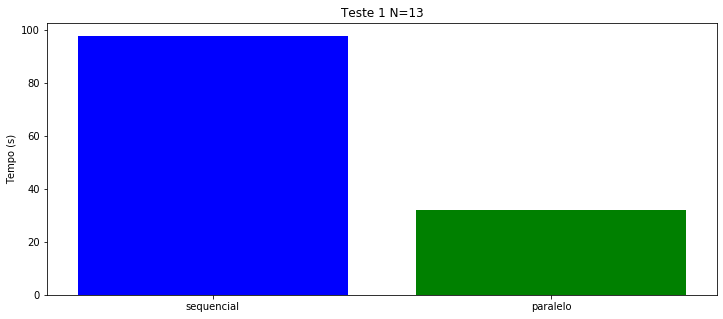

In [7]:
x = np.arange(2)
mean_list = [np.mean(time_main),np.mean(time_para)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green"])
plt.xticks(x, ["sequencial","paralelo"])
plt.ylabel("Tempo (s)")
plt.title("Teste 1 N=13")
plt.show()

## heuristic search e 2-opt
Foram feitos testes com versões paralelas do algoritmo 2-opt e o algoritmo do vizinho mais próximo eles não geram soluções ótimas mas são muito mais rápidos em comparação, geralmente o 2-opt gera soluçoes melhores porem é mais devegar.


## teste 4
Com o n=13 o tempode que demora é de milisegundos

In [8]:
with open('teste4.txt', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_para = [];

for i in range(10):
    main = subprocess.run(["build/heuristic"],input = data,stderr=PIPE)
    main_para = subprocess.run(["build/opt"],input = data,stderr=PIPE)

    time_main.append(float((main.stderr).decode("utf-8")))
    time_para.append(float((main_para.stderr).decode("utf-8")))

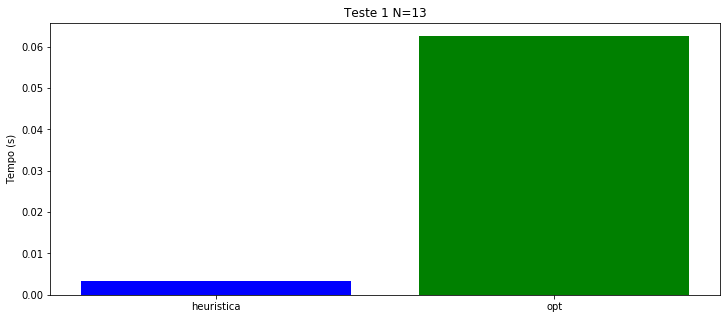

In [9]:
x = np.arange(2)
mean_list = [np.mean(time_main),np.mean(time_para)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green"])
plt.xticks(x, ["heuristica","opt"])
plt.ylabel("Tempo (s)")
plt.title("Teste 1 N=13")
plt.show()

## teste 5
Teste com N=52

In [10]:
with open('largetest.txt', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_para = [];

for i in range(10):
    main = subprocess.run(["build/heuristic"],input = data,stderr=PIPE)
    main_para = subprocess.run(["build/opt"],input = data,stderr=PIPE)

    time_main.append(float((main.stderr).decode("utf-8")))
    time_para.append(float((main_para.stderr).decode("utf-8")))


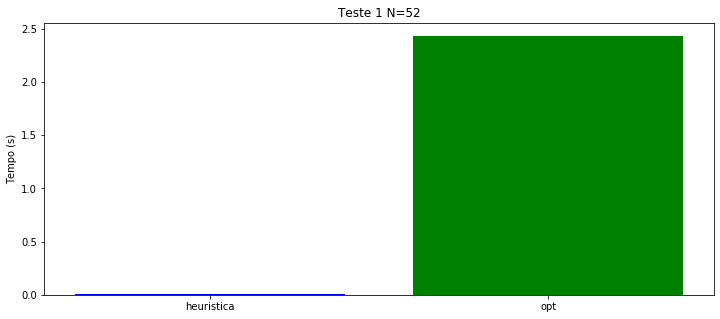

In [11]:
x = np.arange(2)
mean_list = [np.mean(time_main),np.mean(time_para)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green"])
plt.xticks(x, ["heuristica","opt"])
plt.ylabel("Tempo (s)")
plt.title("Teste 1 N=52")
plt.show()

## teste 6
Esse teste usa n=10000 ele compara a heurisca paralela e sequencial

In [12]:
with open('superlargetest.txt', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_para = [];

for i in range(20):
    main = subprocess.run(["build/heuristic"],input = data,stderr=PIPE)
    main_para = subprocess.run(["build/heuristic_seq"],input = data,stderr=PIPE)

    time_main.append(float((main.stderr).decode("utf-8")))
    time_para.append(float((main_para.stderr).decode("utf-8")))

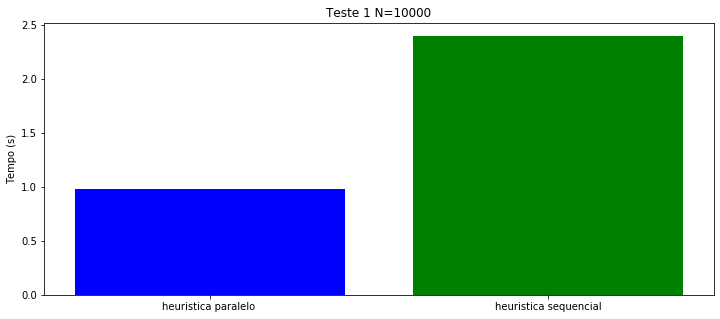

In [13]:
x = np.arange(2)
mean_list = [np.mean(time_main),np.mean(time_para)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green"])
plt.xticks(x, ["heuristica paralelo ","heuristica sequencial"])
plt.ylabel("Tempo (s)")
plt.title("Teste 1 N=10000")
plt.show()

## teste 7
Esse teste usa n=52 ele compara a opt paralelo e sequencial

In [14]:
with open('largetest.txt', 'r') as file:
    data = file.read().replace('\n', ' ')
    data = str.encode(data)

time_main = [];
time_para = [];

for i in range(2):
    main = subprocess.run(["build/opt"],input = data,stderr=PIPE)
    main_para = subprocess.run(["build/opt_seq"],input = data,stderr=PIPE)

    time_main.append(float((main.stderr).decode("utf-8")))
    time_para.append(float((main_para.stderr).decode("utf-8")))

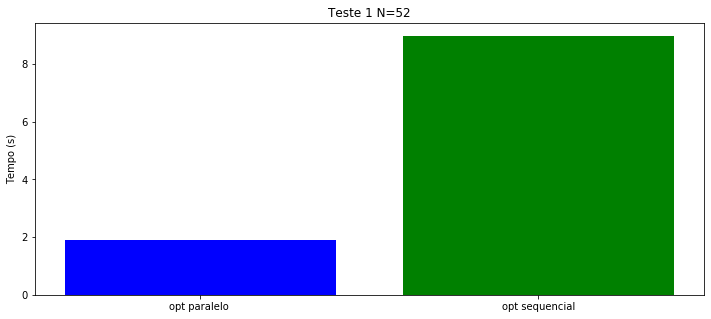

In [16]:
x = np.arange(2)
mean_list = [np.mean(time_main),np.mean(time_para)]

fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x, mean_list, color = ["blue", "green"])
plt.xticks(x, ["opt paralelo ","opt sequencial"])
plt.ylabel("Tempo (s)")
plt.title("Teste 1 N=52")
plt.show()